In [1]:
from numpy.random import seed
from numpy.random import randint
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import string, random
from collections import deque

In this exercise, we will begin to explore the concept of graphs and use it in a Breadth First Search.  We will begin with the base code for as described in Chapter 6 of Grokking Algorithms (Bhargava 2016).  

Example code for the base algorithm is available in the GitHub site for the textbook (https://github.com/egonSchiele/grokking_algorithms/tree/master/06_breadth-first_search/python )

In [7]:
# A modified version of the Grokking book function
def search(name):
    search_queue = deque()
    search_queue += myGraph["initialize"]
    # keeps track of which people you've searched
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this if you haven't already searched this person
        if person not in searched:
            if person == name:
                
                return True
            else:
                search_queue += myGraph[person]
                # Marks person as searched
                searched.append(person)
    return False

Our next step is to create a five level 'connections' graph (all unique, no duplicates).
The first level will have five people and each person in first level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)
Each person in the second level will have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)
Likewise this will happen for the third, fourth, and fifth levels
There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

In [8]:
#Create graph with each subsequent level as one-way connection to the above level

myGraph = {}
# Level 0
myGraph["initialize"] = ["Shane", "Joe", "Susie", "Katie", "Jean"]
# Level 1
myGraph["Shane"]  = ["David", "Brandon", "Troy", "Guy", "Don"]
myGraph["Joe"] = ["David", "Brandon", "Troy", "Guy", "Don"]
myGraph["Susie"] = ["David", "Brandon", "Troy", "Guy", "Don"]
myGraph["Katie"] = ["David", "Brandon", "Troy", "Guy", "Don"]
myGraph["Jean"] = ["David", "Brandon", "Troy", "Guy", "Don"]
# Level 2
myGraph["David"] = ["Erin", "Abbie", "Darlene", "Sam", "Claudia"]
myGraph["Brandon"] = ["Erin", "Abbie", "Darlene", "Sam", "Claudia"]
myGraph["Troy"] = ["Erin", "Abbie", "Darlene", "Sam", "Claudia"]
myGraph["Guy"] = ["Erin", "Abbie", "Darlene", "Sam", "Claudia"]
myGraph["Don"] = ["Erin", "Abbie", "Darlene", "Sam", "Claudia"]
# Level 3
myGraph["Erin"] = ["Kevin", "Jessica", "Tina", "Maria",  "John"]
myGraph["Abbie"] = ["Kevin", "Jessica", "Tina", "Maria",  "John"]
myGraph["Darlene"] = ["Kevin", "Jessica", "Tina", "Maria",  "John"]
myGraph["Sam"] = ["Kevin", "Jessica", "Tina", "Maria",  "John"]
myGraph["Claudia"] = ["Kevin", "Jessica", "Tina", "Maria",  "John"]
# Level 4
myGraph["Kevin"] = ["Danny", "Trevor", "Mary", "Mark", "Mike"]
myGraph["Jessica"] = ["Danny", "Trevor", "Mary", "Mark", "Mike"]
myGraph["Tina"] = ["Danny", "Trevor", "Mary", "Mark", "Mike"]
myGraph["Maria"] = ["Danny", "Trevor", "Mary", "Mark", "Mike"]
myGraph["John"] = ["Danny", "Trevor", "Mary", "Mark", "Mike"]
# Level 5
myGraph["Danny"] = ["Pierce", "Abed", "Annie", "Brita", "Jeff"]
myGraph["Trevor"] = ["Pierce", "Abed", "Annie", "Brita", "Jeff"]
myGraph["Mary"] = ["Pierce", "Abed", "Annie", "Brita", "Jeff"]
myGraph["Mark"] = ["Pierce", "Abed", "Annie", "Brita", "Jeff"]
myGraph["Mike"] = ["Pierce", "Abed", "Annie", "Brita", "Jeff"]
# Level 6
myGraph["Pierce"] = []
myGraph["Abed"] = []
myGraph["Annie"] = []
myGraph["Brita"] = []
myGraph["Jeff"] = []

Now we will search for three people on each level and capture the time for each search.

In [12]:
#We will run each iteration for 1000 times in order to come up with an average

# Three names at level 1
iteration = 0
levelOneTime = 0

while iteration < 1001:
  start = time.perf_counter()
  searchList = ["Susie", "Katie", "Jean"]
  
  stop = time.perf_counter()

  levelOneTime += (stop - start) 
  iteration += 1

# Three names at level 2
iteration = 0
levelTwoTime = 0
searchList = ["Troy", "Guy", "Don"]

while iteration < 1001:
  start = time.perf_counter()
  
  for name in searchList:
    search(name)
  
  stop = time.perf_counter()

  levelTwoTime += (stop - start)
  iteration += 1

# Three names at level 3

iteration = 0
levelThreeTime = 0
searchList = ["Kevin", "Jessica", "Maria"]

while iteration < 1001:
  start = time.perf_counter()

  for name in searchList:
    search(name)
  
  stop = time.perf_counter()

  levelThreeTime += (stop - start)
  iteration += 1


# Three names at level 4
searchList = ["Danny", "Trevor", "Mary"]
iteration = 0
levelFourTime = 0

while iteration < 1001:
  start = time.perf_counter()

  for name in searchList:
    search(name)
  
  stop = time.perf_counter()

  levelFourTime += (stop - start)
  iteration += 1

# Three names at level 5
searchList = ["Pierce", "Abed", "Annie"]
iteration = 0
levelFiveTime = 0

while iteration < 1001:
  start = time.perf_counter()

  for name in searchList:
    search(name)
  
  stop = time.perf_counter()

  levelFiveTime += (stop - start)
  iteration += 1

With this complete we will organize the results of the study into an table showing the 'name' that we searched for, the level of the search (first, second, third, fourth, fifth), and the time it took.

In [16]:
searchResults = pd.DataFrame(np.array([["Susie, Katie, Jean", "Level 1"
                                        , round(levelOneTime,3)]
                                     , ["Troy, Guy, Don", "Level 2"
                                        , round(levelTwoTime, 3)]
                                     , ["Kevin, Jessica, Maria", "Level 3"
                                        , round(levelThreeTime, 3)]
                                     , ["Danny, Trevor, Mary", "Level 4"
                                         , round(levelFourTime, 3)]
                                     , ["Pierce, Abed, Annie", "Level 5"
                                         , round(levelFiveTime, 3)]])
                                     , columns = ["Names Searched", "Level Searched"
                                         , "Search Time (ms)"])

searchResults

,Names Searched,Level Searched,Search Time (ms)
0,"Susie, Katie, Jean",Level 1,0.0
1,"Troy, Guy, Don",Level 2,0.01
2,"Kevin, Jessica, Maria",Level 3,0.032
3,"Danny, Trevor, Mary",Level 4,0.049
4,"Pierce, Abed, Annie",Level 5,0.07


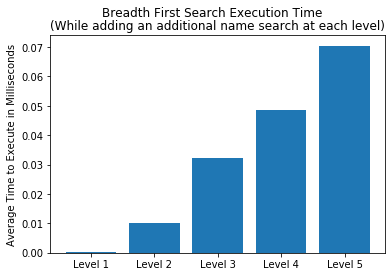

In [17]:
# Create a graph and compare times at each level 

plt.bar(["Level 1", "Level 2", "Level 3", "Level 4", "Level 5"]
        , [levelOneTime, levelTwoTime, levelThreeTime, levelFourTime
           , levelFiveTime])
plt.ylabel('Average Time to Execute in Milliseconds')
plt.suptitle('Breadth First Search Execution Time')
plt.title('(While adding an additional name search at each level)')
plt.show()

Executive Summary:

For this exercise we explored breadth-first search algorithms. These algorithms search nodes of the graph network along edges, so that everytime a name is searched (as long as it exists in the node), it will append all nodes connected to the name that was searched into the queue. As we can see in the graph above, as we increase the levels and complexity of the graph, our search time increases.

In terms of Big O notation, this means that our search algorithm takes O(nodes + edges) in ordre to execute. Because of this, our recommendation is to use only breadth-first algorithms when we actually know what the size of the graph is. If we used these algorithms when the graph size is unknown or unlimmited, then performance will suffer. 